In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
geo_df = gpd.read_file('data/london_boroughs.json')

pca = pd.read_csv("data/pca1_x.csv")

pca.rename(columns={"Unnamed: 0" : "Borough"}, inplace=True)

pca_top_components = pca[["Borough", "PC1", "PC2", "PC3"]]

pca_top_components.head()

,Borough,PC1,PC2,PC3
0,Barking and Dagenham,-6194.868984,503.748930,232.050014
1,Barnet,922.971886,-514.321789,-265.273772
2,Bexley,-10440.125404,462.821462,-170.324975
3,Brent,3307.244216,-369.937748,-693.590447
4,Bromley,-2427.969331,380.347350,327.375540


In [3]:
pca2 = pca[pca.columns[1:]]
pca_normalized=(pca2-pca2.min())/(pca2.max()-pca2.min())

pca_normalized["Borough"] = pca["Borough"]

pca_normalized.head()

spatiotemporal_df = geo_df.merge(pca_normalized, left_on="name", right_on="Borough", how="left")

C:\Users\josea\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


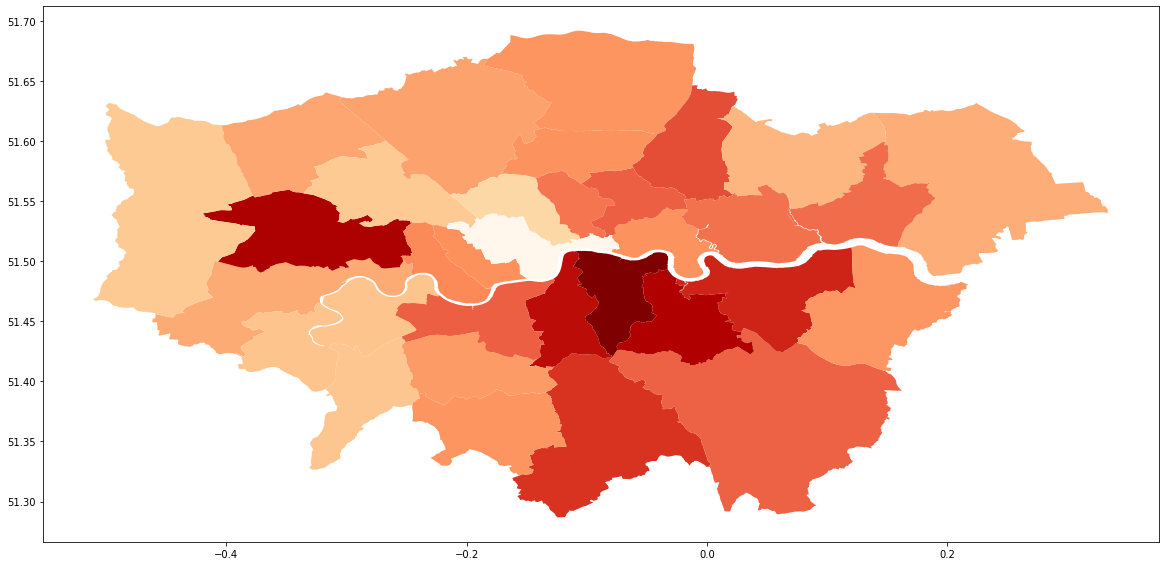

In [35]:
pca_component = "PC3"
spatiotemporal_df.plot(column=pca_component, figsize=(20,12), cmap='OrRd')
plt.savefig("data/crime_pc3.png")

In [14]:
# London is missing from the Borough crime dataset
spatiotemporal_df[spatiotemporal_df["Borough"].isna()]

,id,name,code,area_hectares,inner_statistical,geometry,PC1,PC2,PC3,PC4,...,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,Borough
32,33,City of London,E09000001,314.942,1,"MULTIPOLYGON (((-0.11157 51.51075, -0.11159 51...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
spatiotemporal_pc = pd.read_csv("data/temporal_pcs.csv")

In [57]:
spatiotemporal_pc

,Unnamed: 0,east,pc1,pc2,pc3
0,1,67.504132,1057.320238,-273.294792,-821.746785
1,2,63.393939,561.026254,-41.704059,-652.111950
2,3,66.377410,993.169538,-203.617437,-432.402000
3,4,65.192837,629.842075,-131.437071,-524.068992
4,5,67.914601,1206.190537,-125.111765,-854.669831
...,...,...,...,...,...
127,128,62.958678,699.997340,-262.733554,508.962771
128,129,63.911846,509.602379,-536.495773,202.908504
129,130,68.404959,1530.850752,-483.625083,302.576938
130,131,68.234160,1733.836591,-281.049343,651.923654


In [58]:
df = pd.date_range('2008-01-01', '2019-01-01', freq='M')

In [59]:
df = pd.DataFrame(df)

In [60]:
df["PC1"] = spatiotemporal_pc["pc1"]
df["PC2"] = spatiotemporal_pc["pc2"]
df["PC3"] = spatiotemporal_pc["pc3"]

In [61]:
df.rename(columns={0: "date"},inplace=True)

In [62]:
from scipy.stats import zscore

In [63]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df2 = df[numeric_cols].apply(zscore)
df2["date"] = df["date"]

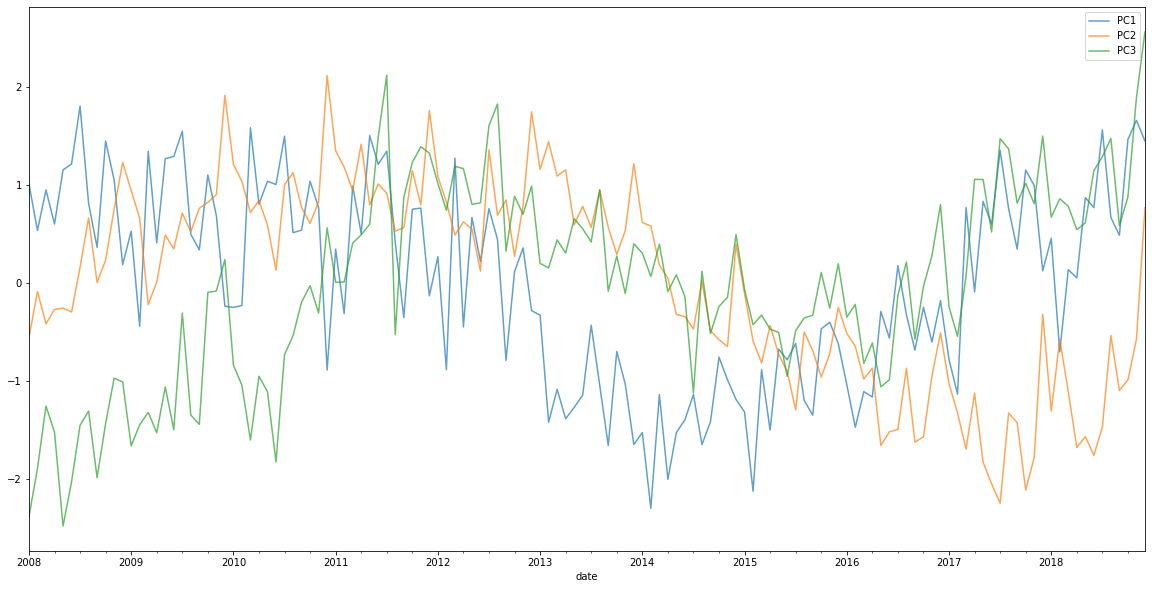

In [65]:
df2.set_index("date").plot(figsize=(20,10), alpha=0.7)
plt.savefig("temporal_pcs.png")